<div style="text-align: center; background-color: #750E21; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  PROJECT: ... 📌
</div>

<div style="text-align: center; background-color: #0766AD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 1 - PRE-PROCESSING 📌
</div>

## **IMPORT LIBRARY** 🎄

In [714]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## **GENERAL INFORMATION ABOUT THE DATA** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. Read data 🔥
</div>

In [715]:
df = pd.read_csv('../../Data/2425_QC.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/3/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/3/2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/1/2016 2:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,3/6/2016 3:36,0


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. Comment on statistic of dataframe 🔥
</div>

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1002 non-null   float64
 1   Age                       1001 non-null   float64
 2   Area Income               1002 non-null   float64
 3   Daily Internet Usage      1002 non-null   float64
 4   Ad Topic Line             1002 non-null   object 
 5   City                      1002 non-null   object 
 6   Male                      1002 non-null   int64  
 7   Country                   1002 non-null   object 
 8   Timestamp                 1002 non-null   object 
 9   Clicked on Ad             1002 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.4+ KB


📈`COMMENT:`
- Data Overview: The DataFrame has 1002 entries. There are 10 columns in total, with a mix of data types: float64, int64, and object. 
- dtypes: float64(4), int64(2), object(4)
- All columns, except `Age`, contain 1002 non-null values, meaning there’s only 1 missing value for the `Age` column.
- Columns like `Age`, `Area Income`, `City`, `Country`, and `Male` provide key demographic details, possibly used to profile customers.
- The dataset includes `Daily Time Spent on Site` and `Daily Internet Usage`, which track users' online behavior and engagement. These could be critical features for determining customers's likelihood of interacting with ads.
- `Ad Topic Line` might represent the theme or content of the advertisement.
- `Clicked on Ad` likely serves as a target variable, a binary classification indicating whether a user clicked an ad (1 for clicked, 0 for not clicked).
- `Timestamps` column can provide insights into the temporal patterns of customer behavior.

📝`INSIGHT:`
- The dataset is almost complete with only a single missing value in the `Age` column, so missing data handling won't be a major issue.
- The combination of online activity, demographic information, and customer interaction (clicked or not clicked) creates a strong foundation for building models to predict ad clicks based on customer behavior.
- Columns like `City`, `Country`, and `Ad Topic Line` will likely require preprocessing, such as encoding, to make them suitable for analysis or modeling.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. What does each column mean?? 🧮
</div>

<table style="width: 100%; border-collapse: collapse;font-family: 'Trebuchet MS', Arial, sans-serif;">
  <thead>
    <tr>
      <th style="min-width: 10px; width: 30px; background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">No</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Column Name</th>
      <th style="background-color: #4E70BB; color: white; font-size :20px; font-weight: bold; text-align: left; padding: 8px;">Meaning</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">1</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">Daily Time Spent on Site</td>
      <td style="font-size: 17px; text-align: left;">Customer time on site in minutes.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">2</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">Age</td>
      <td style="font-size: 17px; text-align: left;">Customer age in years.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">3</td>
      <td style="font-weight: bold; font-size: 17px; color: #009A80; text-align: left;">Area Income</td>
      <td style="font-size: 17px; text-align: left;">Average income of geographical area of customer.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">4</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">Daily Internet Usage</td>
      <td style="font-size: 17px; text-align: left;">Average minutes a day customer is on the internet.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">5</td>
      <td style="font-weight: bold; font-size: 17px; color: #EAE509; text-align: left;">Ad Topic Line</td>
      <td style="font-size: 17px; text-align: left;">Headline of the advertisement.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">6</td>
      <td style="font-weight: bold; font-size: 17px; color: #3081D0; text-align: left;">City</td>
      <td style="font-size: 17px; text-align: left;">City of customer.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">7</td>
      <td style="font-weight: bold; font-size: 17px; color: #FFAA33; text-align: left;">Male</td>
      <td style="font-size: 17px; text-align: left;">Whether or not customer was male.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">8</td>
      <td style="font-weight: bold; font-size: 17px; color: #FF0077; text-align: left;">Country</td>
      <td style="font-size: 17px; text-align: left;">Country of customer.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">9</td>
      <td style="font-weight: bold; font-size: 17px; color: #00A9FF; text-align: left;">Timestamp</td>
      <td style="font-size: 17px; text-align: left;">Time at which customer clicked on Ad or closed window.</td>
    </tr>
    <tr>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">10</td>
      <td style="font-weight: bold; font-size: 17px; color: #7DCE13; text-align: left;">Clicked on Ad</td>
      <td style="font-size: 17px; text-align: left;">0 or 1 indicated clicking on Ad.</td>
    </tr>
  </tbody>
</table>

## **PROCESS PHASE** 📝

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  1. How many rows and how many columns does the data have? 🧮
</div>

In [717]:
shape = df.shape
print(f"Current shape: {shape}")

Current shape: (1002, 10)


<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  2. What does each line mean? Does it matter if the lines have different meanings? 🧮
</div>

🔍🔍🔍 Understand the meaning of each line gives us a more overall understanding of the data.\
🔍🔍🔍 What our data is talking about or if some lines of data have different meanings, it will lead to the unconsistency of data and giving wrong insights.

📈`COMMENT:`
- Each row represents data about an individual's interaction with an online advertisement.
- This dataset would typically be used to analyze and predict user behavior, particularly what factors influence a customer's likelihood to click on an ad. Insights drawn from this kind of data help companies refine their ad strategies, target the right audiences, and optimize their marketing budget.

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #E7B10A; padding: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
🧮🧮🧮  In our data, each line contains data about an individual's interaction with an online advertisement.
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  3. Is there duplicate data? 🧮
</div>

🚨  We need to check for the duplicated rows since duplicated rows don't have much meaning, even affect the overall insight of data.\
🚨  Therefore, each line should differ from each others.\
🚨  Having duplicated rows could lead to wrong insights for questions required counting.\
🚨  In this part, we will delve into check for duplicated rows. If duplicated rows exist, then drop it.

📈`COMMENT:`
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  4. Is there outlier data? 🧮
</div>

🚨  Outliers are values that significantly deviate from other observations in the dataset.\
🚨  Outliers can skew results and lead to misleading conclusions if not handled properly.\
🚨  Identifying outliers is important to maintain data quality and improve the accuracy of the analysis.\
🚨  In this part, we will check for any outliers and determine whether to keep, transform, or remove them depending on their impact. And we will only check for numerical value because categorical value does not have outliers.

In [718]:
df.describe()[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1002.000000,1001.000000,1002.000000,1002.000000
mean,64.988303,36.024975,55001.837565,180.031637
std,15.870862,8.785692,13401.410392,43.893820
min,32.600000,19.000000,13996.500000,104.780000
25%,51.320000,29.000000,47073.067500,138.905000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.562500,42.000000,65451.787500,218.797500
max,91.430000,61.000000,79484.800000,269.960000


📈`COMMENT:`
- Notice that the **Area Income** column is likely to have outliers.For example, the min **Area Income** is approximately 13996 while its mean is 55001. The mean is sensitive to outliers, but the fact the mean is so big compared to the min value indicates the min value is an outlier

📝 **Using IQR**

Using the statistical method called interquartile range **(IQR)**, the outlier data points are the ones falling below **Q1–1.5\*IQR** or above **Q3 + 1.5\*IQR**. The Q1 is the **25th percentile** and Q3 is the **75th percentile** of the dataset, and **IQR** represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 

Using the convenient pandas **.quantile()** function, we can create a simple Python function that takes in our column from the dataframe and outputs the outliers.

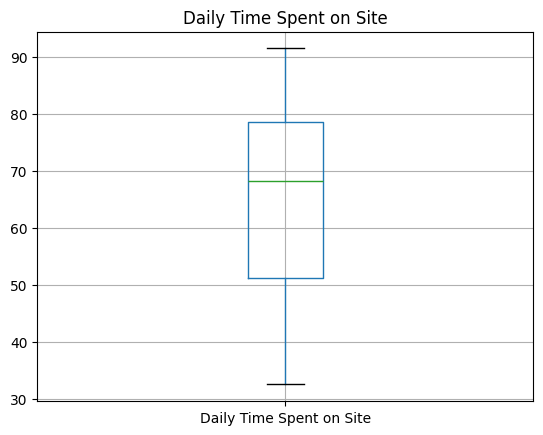

In [719]:
def findOutlierUsingIQR(df:pd.DataFrame):
    
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    lowerLimit=q1-1.5*IQR
    upperLimit=q3+1.5*IQR
    
    outliers = df[(df<lowerLimit) | (df>upperLimit)]

    return outliers

pd.DataFrame(df['Daily Time Spent on Site']).boxplot()
plt.title("Daily Time Spent on Site")
plt.show()


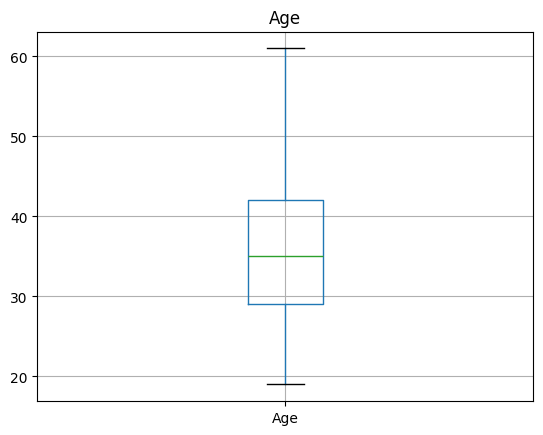

In [720]:
pd.DataFrame(df['Age']).boxplot()
plt.title("Age")
plt.show()

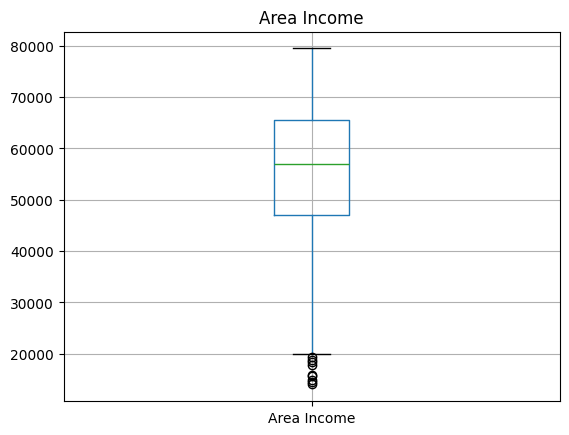

In [721]:
pd.DataFrame(df['Area Income']).boxplot()
plt.title("Area Income")
plt.show()

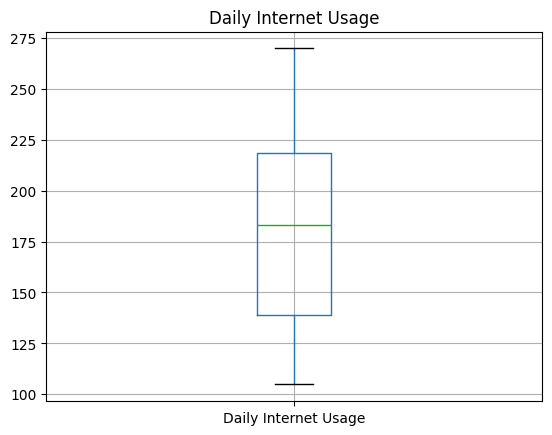

In [722]:
pd.DataFrame(df['Daily Internet Usage']).boxplot()
plt.title("Daily Internet Usage")
plt.show()

In [723]:
outliers = findOutlierUsingIQR(df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']])

outliers=outliers[~outliers.isnull().all(axis=1)]
print(outliers)

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage
135                       NaN  NaN     17709.98                   NaN
410                       NaN  NaN     19345.36                   NaN
510                       NaN  NaN     18819.34                   NaN
640                       NaN  NaN     15598.29                   NaN
665                       NaN  NaN     15879.10                   NaN
692                       NaN  NaN     14548.06                   NaN
769                       NaN  NaN     13996.50                   NaN
779                       NaN  NaN     14775.50                   NaN
953                       NaN  NaN     18368.57                   NaN


📈`COMMENT:`
- As predicted above, we detect 9 outliers in the **Area Income** column by using IQR method.

In [724]:
idx=outliers[~outliers.isnull().all(axis=1)].index
df.iloc[idx]


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
135,49.89,39.0,17709.98,160.03,Enhanced system-worthy application,East Michele,1,Belize,16/4/2016 12:09,1
410,48.09,33.0,19345.36,180.42,Balanced motivating help-desk,West Travismouth,0,Heard Island and McDonald Islands,28/5/2016 12:38,1
510,57.86,30.0,18819.34,166.86,Horizontal modular success,Estesfurt,0,Algeria,8/7/2016 17:14,1
640,64.63,45.0,15598.29,158.80,Triple-buffered high-level Internet solution,Isaacborough,1,Azerbaijan,12/6/2016 3:11,1
665,58.05,32.0,15879.10,195.54,Total asynchronous architecture,Sanderstown,1,Tajikistan,12/2/2016 10:39,1
692,66.26,47.0,14548.06,179.04,Optional full-range projection,Matthewtown,1,Lebanon,25/4/2016 19:31,1
769,68.58,41.0,13996.50,171.54,Exclusive discrete firmware,New Williamville,1,El Salvador,6/7/2016 12:04,1
779,52.67,44.0,14775.50,191.26,Persevering 5thgeneration knowledge user,New Hollyberg,0,Jersey,19/5/2016 6:37,1
953,62.79,36.0,18368.57,231.87,Total coherent archive,New James,1,Luxembourg,30/5/2016 20:08,1


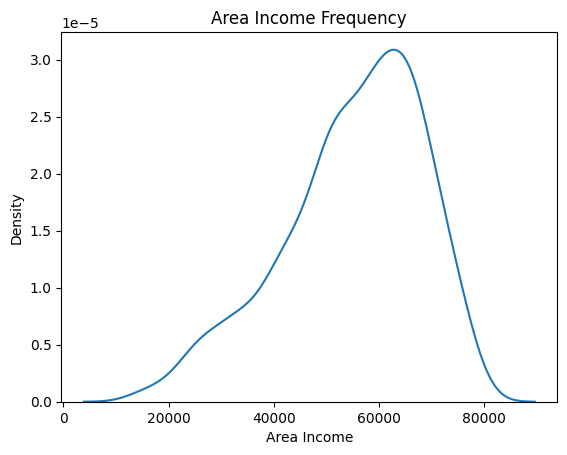

In [725]:
sns.kdeplot(data = df["Area Income"])
plt.title("Area Income Frequency")
plt.show()

📈`COMMENT:`
- The outliers represent **Area Income** and those are reasonable income, remove those would not be optional, so we will replace the outliers by capping them. 
- For the upper limit, we will use the mean plus three standard deviations. For the lower limit, we will calculate it as the mean minus 3 standard deviations, as the **Area Income** follows the normal distribution.

In [726]:
#Chưa biết có nên đổi ở dataframe gốc hay không nên tui copy ra nhá :>
dfCopy=df.copy()

#C1:Thay đổi outliers

# 1.1:Dùng IQR
q1=dfCopy['Area Income'].quantile(0.25)
q3=dfCopy['Area Income'].quantile(0.75)
lower_limit = q1 - 1.5*(q3 - q1)
upper_limit = q3 + 1.5*(q3 - q1)
print(upper_limit)
print(lower_limit)

# 1.2:Dùng mean()-3*std() và mean()+3*std()
# upper_limit = df['Area Income'].mean() + 3*df['Area Income'].std()
# print(upper_limit)
# lower_limit = df['Area Income'].mean() - 3*df['Area Income'].std()
# print(lower_limit)

dfCopy['Area Income'] = np.where(
    dfCopy['Area Income'] > upper_limit,
    upper_limit,
    np.where(dfCopy['Area Income'] < lower_limit, 
        lower_limit,
        dfCopy['Area Income'])
)

#C2:Xóa outliers
#dfCopy=dfCopy.iloc[~idx]
dfCopy.describe()[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']]

93019.8675
19504.987499999996


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1002.000000,1001.000000,1002.000000,1002.000000
mean,64.988303,36.024975,55028.288850,180.031637
std,15.870862,8.785692,13326.918589,43.893820
min,32.600000,19.000000,19504.987500,104.780000
25%,51.320000,29.000000,47073.067500,138.905000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.562500,42.000000,65451.787500,218.797500
max,91.430000,61.000000,79484.800000,269.960000


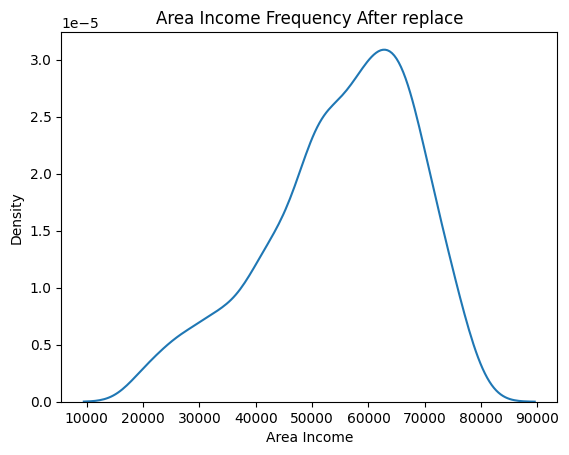

In [727]:
sns.kdeplot(data = dfCopy["Area Income"])
plt.title("Area Income Frequency After replace")
plt.show()

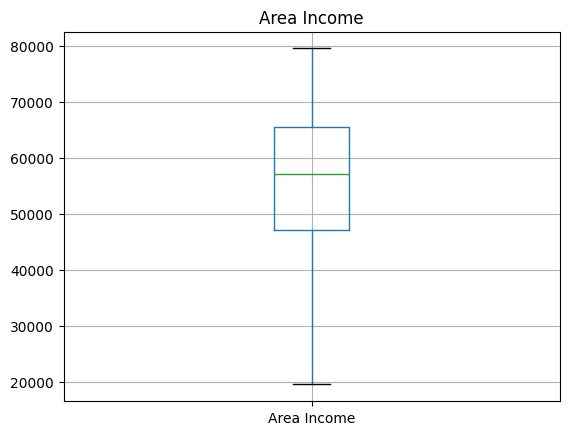

In [728]:
pd.DataFrame(dfCopy['Area Income']).boxplot()
plt.title("Area Income")
plt.show()

📈`Conclusion:`
- The distribution did not get affected after replacing. Also, as the outlier values were replaced by the max and min limit, notice, how in the PDF or KDEplot, there are more values near 20000.

📝 **Using Z-Score**

Explain...

📈`COMMENT:`
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  5. Is there missing data? 🧮
</div>

🚨  Missing data can distort the results of our analysis and lead to inaccurate insights.\
🚨  It is crucial to identify and handle missing values effectively.\
🚨  If missing data exists, we will explore strategies to fill or remove them based on the context and nature of the dataset.\
🚨  In this section, we will analyze for any missing values and take necessary actions such as filling, imputation, or removal.

📈`COMMENT:`
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  6. Is there any imbalance in "Clicked on AD" labels?
</div>

🔍🔍🔍 ... Explain what is this?
🔍🔍🔍 ... Explain what is this?

📈`COMMENT:`
- ...

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding-left: 20px; padding-bottom:10px;padding-top:10px;font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  6.  What data type does each column currently have? 🧮
</div>
<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding-left: 20px; padding-bottom:20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
      Are there any columns whose data types are not suitable for further processing? 🧮
</div>

👀 Next we will take a look at the data type of each column.

In [729]:
df.dtypes

Daily Time Spent on Site    float64
Age                         float64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

👀 We can clearly see that the data type of `Age` column is **float64** so we will convert it into **int64**.

In [730]:
df['Age'] = df['Age'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

👀`Timestamp` are problaly date-time data type. We convert this column into **date-time**.

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M')

👀 Now let's take a look again the data types of each column.

In [18]:
df.dtypes

Daily Time Spent on Site           float64
Age                                float64
Area Income                        float64
Daily Internet Usage               float64
Ad Topic Line                       object
City                                object
Male                                 int64
Country                             object
Timestamp                   datetime64[ns]
Clicked on Ad                        int64
dtype: object

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FFC436; padding-left: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
We can see that although we try to convert the values of these columns into integer, their data types are still float64. 
</div>
<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #FFC436; padding: 15px; font-size: 18px; font-weight: bold; border-radius: 0 0 0 0">
This is beacause integer data type doesn't allow for <font color=#E64848>NaN</font> so if there is a <font color=#E64848>NaN</font> value in the column, the column data type will automatically upcasted to <font color=#3CCF4E style="font-weight: bold">float</font>.
</div>

<div style="text-align: left; font-family: 'Trebuchet MS', Arial, sans-serif; color: #8C3333; padding: 20px; font-size: 25px; font-weight: bold; border-radius: 0 0 0 0; background-color: #AFC8AD">
  7. For each column with numeric data type, how are the values distributed ? 🧮
</div> 